### K-近邻算法
##### K-近邻算法优缺点：
###### 优点：精度高、对异常值不敏感、无数据输入假定
###### 缺点：计算复杂度高、空间复杂度高
###### 适用场景：数据为数值型或者标称型（一般在有限的数据中取，而且只存在‘是’和‘否’两种不同的结果）
###### 工作原理：存在一个样本数据集合（训练样本集），并且样本集中每个数据都存在label（知道样本集中每一数据与所属分类的对应关系）。
###### 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中最相似数据（最近邻）的分类标签。
###### 一般只选择样本数据集中最相似的K个数据，通常K为大于20的整数。最后选择所选数据中出现次数最多的分类作为新数据的分类。

# 可以将下面代码打包成KNN.py，使用import KNN导入该模块
### 对未知类别的数据集中每个案例依次执行以下操作
##### 1.计算已知类别数据集中的点与当前点的距离
##### 2.按照距离递增次序排序
##### 3.选取与当前案例距离最小的K个点
##### 4.确定前K个点出险频率
##### 5.返回前K个点中出险次数最多的类别作为当前案例的预测类别

In [3]:
from numpy import *
# 导入运算符模块
import operator

def creatDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels


#构造分类器
def classify(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    # 求解矩阵欧式距离，inX是待分类向量
    diffMat=tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    # print(diffMat,sqDiffMat)
    # 按行相加
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
    # print(sqDistances,distances)
    # 按照距离大小排序
    sorteDistances=sqDistances.argsort()
    # print(sorteDistances)
    classCount={}
    for i in range(k):
        voteIlabel=labels[sorteDistances[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    # 按照类别次序排序
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    # print(sortedClassCount)
    return sortedClassCount[0][0]


dataSet,labels=creatDataSet()
# 测试
print(classify([1,1],dataSet,labels,3))


A


# 在数据集上使用K-近邻算法
### 搜集数据
### 准备数据
### 分析数据（使用matplotlib画出二维扩散图）
### 训练算法：不适用于K-近邻算法
### 测试算法：使用部分数据作为测试样例（已经分好类的数据）
### 使用算法：产生简单的命令行程序通过输入一组样例判断类型


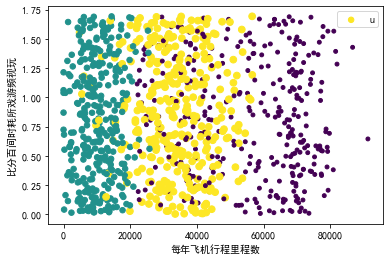

In [7]:


# 返回训练样本矩阵和类标签向量
def fileMatrix(filename):
    with open(filename,'r+') as f:
        arrayOLines=f.readlines()
    # 得到文件数
    numberOfLines=len(arrayOLines)
    # 创建返回的Numpy矩阵
    returnMat=zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index,:]=listFromLine[0:3]
        # print(listFromLine)
        # 进行label encode
        if listFromLine[-1]=="largeDoses":
            classLabelVector.append(3)
        elif listFromLine[-1]=="smallDoses":
            classLabelVector.append(2)
        else:
            classLabelVector.append(1)
        index+=1
    return returnMat,classLabelVector

# 加载模块
# reload(KNN)
### datingTestSet数据集中包含四列数据：
### 分别是：每年飞机里程数，每周消耗冰淇淋公升数，玩游戏所耗时间比，喜欢程度
datingDataMat,datingLabels=fileMatrix(r'datingTestSet.txt')
# datingDateMat
# datingLabel[0:20]

# 使用matplotlib画出散点图
import matplotlib.pyplot as plt
import matplotlib

def Scatter(datingDataMat,datingLabels):
    # 设置字体
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 创建画布
    fig=plt.figure()
    ax=fig.add_subplot(111)
    # ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
    # ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
    # ax.axis([-2,25,-0.2,2.0])
    # plt.xlabel('玩视频游戏所耗时间百分比')
    # plt.ylabel('每周消耗的冰淇淋公升数'[::-1])
    # labels=['不喜欢','一般喜欢','非常喜欢']
    ax.scatter(datingDataMat[:,0],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
    plt.xlabel('每年飞机行程里程数')
    plt.ylabel('玩视频游戏所耗时间百分比'[::-1])
    
    plt.legend('upper right')
    plt.show()
Scatter(datingDataMat,datingLabels)
    
    


### 准备数据（数据预处理）
##### 数值归一化：一般用在样本的某一特征列数量级明显大于其他特征列，可以采用数值归一化
##### newValue=(oldValue-min)/(max-min),min和max分别表示该特征列最小值与最大值

In [16]:


def autoNorm(dataSet):
    # 选取每一列的最大，最小值
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    # print(minVals,maxVals)
    ranges=maxVals-minVals
    # 初始化归一化数据集
    normDataSet=zeros(shape(dataSet))
    # 得到第一列数据长度
    m=dataSet.shape[0]
    # tile函数为复制函数
    # print(normDataSet)
    normDataSet=dataSet-tile(minVals,(m,1))
    # print(normDataSet)
    normDataSet=normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

normMat,ranges,minValue=autoNorm(datingDataMat)

# tile?
# 矩阵除法：numpy.linalg.solve(matA.matB)

### 测试数据
##### 算法评估采用精度和错误率来评估
##### 精度=1-错误率
##### 错误率=测试错误数/测试总数


In [21]:

def datingClassTest():
    # 设置测试数据所占比例
    hoRatio=0.10
    # 获取数据
    dataingDataMat,datingLabels=fileMatrix(r'datingTestSet.txt')
    # 数据归一化
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    # 测试数据长度
    numTestVecs=int(m*hoRatio)
    errorCount=0
    for i in range(numTestVecs):
        # 获取分类器分类结果
        # 分类器参数分别为：待分类数据集，已经分类的数据集，标签，只计算距离最近的前三个点
        classifierResult=classify(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the %d classifier came back with: %d, the real answer is: %d'%(i,classifierResult,datingLabels[i]))
        if (classifierResult!=datingLabels[i]):
            errorCount+=1
    print('the total error rate is: %f'%(errorCount/float(numTestVecs)))

# datingClassTest()

In [33]:
### 预测函数
##### 根据用户输入数据进行预测
def classifyPerson():
    resultList=['not at all','in small doses','in large doses']
    # 键入需要预测的案例特征数据
    # percentTats=float(raw_input('percentage of  time spent playing voideo games?'))
    # ffMiles=float(raw_input('frequent flier miles earned per year?'))
    # iceCream=float(raw_input('liters of ice cream consumed per year?'))
    percentTats=10
    ffMiles=15000
    iceCream=0.9
    
    datingDataMat,datingLabels=fileMatrix(r'datingTestSet.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    
    inArr=array([ffMiles,percentTats,iceCream])
    # classfierResult 取值为[1,2,3]
    classifierResult=classify((inArr-minVals)/ranges,normMat,datingLabels,3)
    print('you will probably like this person: ',resultList[classifierResult-1])
classifyPerson()
    

you will probably like this person:  in large doses


# 手写数字识别
### 搜集数据
##### 数据集介绍：在trainingDigits中包含了约2000个例子，每个数字大约有200个样本；
##### 在testDigits中大约900个测试数据

### 准备数据：将图像格式转换为列表形式
### 分析数据：在命令行检查数据
### 训练算法：不适用于K近邻算法
### 测试算法：编写函数使用提供的部分数据集作为测试样本，测试样本与非测试样本的区别在于是否完成分类，使用错误率进行算法评估
### 使用算法：从图像中提取数字完成识别

In [39]:


### 首先编写一个向量转换器，将一个32x32的二进制图像转换为1x1024的一维向量
def img2Vector(filename):
    returnVect=zeros((1,1024))
    with open(filename,'r+') as f:
        lines=f.readlines()
    for i in range(32):
        for j in range(32):
            returnVect[0,32*i+j]=int(lines[i][j])
    return returnVect

# 查看运行结果
img2Vector(r'digits/testDigits/0_13.txt')[0,0:31]

from os import listdir

# 测试算法：使用K近邻算法识别手写字
def handwritingClassTest():
    hwLabels=[]
    trainingFileList=listdir(r'digits/trainingDigits')
    m=len(trainingFileList)
    trainingMat=zeros((m,1024))
    for i in range(m):
        # 获取数字图像的标签
        fileNameStr=trainingFileList[i]
        fileStr=fileNameStr.split('.')[0]
        classNumStr=int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 将每一个文本的数字图像转换为一维向量
        trainingMat[i,:]=img2Vector(r'digits/trainingDigits/%s'% fileNameStr)
        
    testFileList=listdir(r'digits/testDigits')
    errorCount=0.0
    mTest=len(testFileList)
    for i in range(mTest):
        fileNameStr=testFileList[i]
        fileStr=fileNameStr.split('.')[0]
        classNumStr=int(fileStr.split('_')[0])
        vectorUnderTest=img2Vector(r'digits/testDigits/%s'% fileNameStr)
        
        # 使用分类器将测试数据进行分类
        classifierResult=classify(vectorUnderTest,trainingMat,hwLabels,3)
        
        print('the classifier came back with: %d, the real answer is: %d'%(classifierResult,classNumStr))
        if (classifierResult !=classNumStr):
            errorCount+=1
    print('\nthe total number of errors is: %d'%errorCount)
    print('\nthe total error rate is: %f' %(errorCount/float(mTest)))


handwritingClassTest()



the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answe

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answe

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 6, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 8, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answe

### 本章小结
##### K-近邻算法是分类数据最简单最有效的方法
##### K-近邻算法是基于实例的学习，必须保存全部数据集，如果数据集过大，必须使用大量的存储空间
##### K-近邻算法必须对每个数据计算距离值，实际使用时可能非常耗时
##### K-近邻算法无法给出任何数据的基础结构信息，无法知晓平均实例样本和典型实例样本具有什么特征
